In [1]:
import pickle
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

In [2]:
web_features1 = []
web_features0 = []

for batch in range(0,100):
    with open('./feature_data/web_content_features_1_'+str(batch)+'.pkl', 'rb') as f:
        web_features1 += pickle.load(f)

    with open('./feature_data/web_content_features_0_'+str(batch)+'.pkl', 'rb') as f:
        web_features0 += pickle.load(f)

print('content feature')
#print(web_features1)
#print(web_features0)
print(len(web_features1))
print(len(web_features0))


web_not_working = [ind for ind,ft in enumerate(web_features1) if ft[0] =='Empty']
web_not_english = [ind for ind,ft in enumerate(web_features1) if ft[0] =='Non-EN']
web_not = [ind for ind,ft in enumerate(web_features1) if len(ft) <=9]
print(web_features1[1])
web_features1 = [ft for ft in web_features1 if len(ft) >9]



unwhite_tb = pd.DataFrame(web_features1)
unwhite_tb['label'] = 1

print(web_features0)
web_not_working2 = [ind for ind,ft in enumerate(web_features0) if ft[0] =='Empty']
web_not_english2 = [ind for ind,ft in enumerate(web_features0) if ft[0] =='Non-EN']
web_features0 = [ft for ft in web_features0 if len(ft) >9]


white_tb = pd.DataFrame(web_features0)
white_tb['label'] = 0

print(len(web_features1))
print(len(web_features0))

all_tb = pd.concat([unwhite_tb,white_tb]).reset_index(drop=True)

X1 = all_tb.loc[:, all_tb.columns != 'label']
y1 = all_tb.loc[:, all_tb.columns == 'label']

content feature
5388
13977
['Non-EN', 19473, 0, 'Non-EN', -1, -1, -1, -1]
[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 19473, 0, 1, 1, 1, 1], ['Empty'], [13.21, 19.5, 17.8, 16.08, 11.97, 22.3, 61, 17.75, 19.63, 13.9, 7699.875, 38, 0, 0, 0, 1], ['Non-EN', 19473, 0, 'Non-EN', -1, -1, -1, -1], [13.78, 17.2, 0.0, 19.44, 11.19, 20.2, 15, 18.75, 15.36, 4.38, 7738.555555555556, 18, 1, 1, 1, 1], ['Non-EN', 19473, 0, 'Non-EN', -1, -1, -1, -1], [55.24, 9.5, 0.0, 7.83, 8.38, 7.8, 4, 8.0, 8.9, 1.06, 8434.24, 238, 1, 1, 0, 1], ['Non-EN', 19473, 0, 'Non-EN', -1, -1, -1, -1], ['Non-EN', 19473, 0, 'Non-EN', -1, -1, -1, -1], ['Empty'], ['Non-EN', 19473, 0, 'Non-EN', -1, -1, -1, -1], [-0.95, 16.6, 0.0, 23.13, 18.86, 21.3, 15, 11.25, 15.97, 2.91, 6777.5, 28, 1, 0, 1, 1], [1.77, 19.7, 0.0, 22.98, 12.58, 25.0, 11, 21.5, 18.21, 2.78, 9752.333333333334, 31, 1, 1, 1, 1], [59.3, 8.0, 0.0, 11.82, 9.5, 9.7, 4, 3.0, 11.47, 0.94, 19473, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 19473, 0, -1, -1, -1, -1], [14.33, 19.0, 20.

In [4]:
len(web_features1)

4297

In [5]:
len(web_features0)

8601

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import svm, datasets
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import StratifiedKFold
import numpy as np
from sklearn.metrics import roc_auc_score

In [7]:
y1['label'].tolist()

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [8]:
X1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,51.18,11.1,0.0,11.14,9.37,12.1,5,11.0,8.00,1.47,19473.000000,0,0,0,1,1
1,-262.14,121.1,0.0,22.42,26.01,153.3,115,93.0,124.14,28.00,19473.000000,0,-1,-1,-1,-1
2,4.14,20.9,0.0,17.24,11.97,23.0,25,24.5,18.65,5.73,19473.000000,4,0,1,0,1
3,0.00,0.0,0.0,0.00,0.00,0.0,0,0.0,0.00,0.00,11437.469697,146,0,0,1,0
4,-181.62,79.8,0.0,28.80,21.29,98.6,88,92.0,79.41,19.20,9099.434783,104,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12893,0.00,0.0,0.0,0.00,0.00,0.0,0,0.0,0.00,0.00,7879.631579,57,0,0,0,0
12894,0.00,0.0,0.0,0.00,0.00,0.0,0,0.0,0.00,0.00,7776.666667,27,0,1,1,1
12895,-3.99,24.0,0.0,19.57,13.76,29.3,19,32.5,24.20,3.83,19473.000000,6,1,1,1,0
12896,-272.29,125.0,0.0,23.12,22.30,159.1,60,80.0,123.24,29.62,19473.000000,0,-1,-1,-1,-1


<ipython-input-9-33b90ae4a0ac>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X1.iloc[train], y1.iloc[train])
<ipython-input-9-33b90ae4a0ac>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X1.iloc[train], y1.iloc[train])
<ipython-input-9-33b90ae4a0ac>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X1.iloc[train], y1.iloc[train])
<ipython-input-9-33b90ae4a0ac>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X1.iloc[train], y1.iloc[train])
<ipython-input-9-33b90ae4a0ac>:12: DataConve

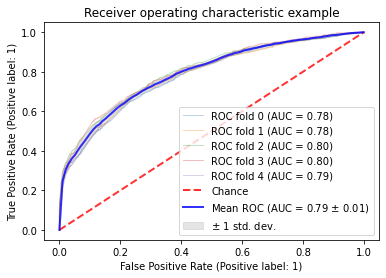

In [9]:
cv = StratifiedKFold(n_splits=5,random_state = 611,shuffle=True)
#classifier = svm.SVC( random_state=5)
#classifier = LogisticRegression(random_state=5)
#classifier = LogisticRegressionCV(random_state=5)
classifier = RandomForestClassifier(max_depth=20,n_estimators = 500, random_state=0)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X1, y1)):
    classifier.fit(X1.iloc[train], y1.iloc[train])
    viz = RocCurveDisplay.from_estimator(
        classifier,
        X1.iloc[test],
        y1.iloc[test],
        name="ROC fold {}".format(i),
        alpha=0.3,
        lw=1,
        ax=ax,
    )
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="Receiver operating characteristic example",
)
ax.legend(loc="lower right")
plt.show()

In [7]:
import numpy as np

In [42]:
abs_features1 = []
abs_features0 = []

for batch in range(100):
    with open('./labeled_feature_data/web_content_features_1_'+str(batch)+'_abs.pkl', 'rb') as f:
        tmp = pickle.load(f)
        #print(tmp)
        dt = [[tt for tt in t if len(tt) == 10] for t in tmp if len(t) >0 and len([tt for tt in t if len(tt)==10])]
        #print(dat)
        abs_features1 += [np.mean(np.array(t), axis=0) for t in dt]

    with open('./labeled_feature_data/web_content_features_0_'+str(batch)+'_abs.pkl', 'rb') as f:
        tmp = pickle.load(f)
        dt = [[tt for tt in t if len(tt) == 10] for t in tmp if len(t) >0 and len([tt for tt in t if len(tt)==10])]
        
        abs_features0 += [np.mean(np.array(t), axis=0) for t in dt]

print('abstract feature')
#print(abs_features1)
#print(abs_features0)
print(len(abs_features1))
print(len(abs_features0))


#abs_features1 = [np.mean(np.array(ft), axis=0) for ft in abs_features1 if len([f for f in ft if len(f) == 10]) > 0]



unwhite_tb = pd.DataFrame(abs_features1)
unwhite_tb['label'] = 1

#abs_features0 = [np.mean(np.array(ft), axis=0) for ft in abs_features0 if len([f for f in ft if len(f) == 10]) > 0]


white_tb = pd.DataFrame(abs_features0)
white_tb['label'] = 0

print(len(abs_features1))
#print(abs_features1)
print(len(abs_features0))

all_tb = pd.concat([unwhite_tb,white_tb]).reset_index(drop=True)

X1 = all_tb.loc[:, all_tb.columns != 'label']
y1 = all_tb.loc[:, all_tb.columns == 'label']

abstract feature
1527
4164
1527
4164


In [43]:
X1

,0,1,2,3,4,5,6,7,8,9
0,-1124.440000,170.800000,0.000000,88.520000,14.310000,74.300000,1.000000,2.000000,14.530000,0.280000
1,39.650000,12.200000,13.840000,13.550000,10.220000,13.460000,49.000000,12.438095,12.844000,14.568000
2,-35.130000,19.400000,0.000000,14.240000,13.360000,10.300000,2.000000,1.500000,2.000000,0.350000
3,-109.240000,29.200000,0.000000,11.150000,14.310000,9.900000,1.000000,0.500000,1.200000,0.240000
4,-50.334286,27.914286,7.785714,16.432857,14.842857,28.528571,37.428571,10.183333,16.652857,11.934286
...,...,...,...,...,...,...,...,...,...,...
5686,24.110000,17.400000,17.100000,16.080000,11.700000,21.300000,40.000000,16.750000,17.330000,10.340000
5687,-387.400000,67.800000,0.000000,-7.410000,0.100000,-1.700000,0.000000,0.000000,0.800000,0.090000
5688,36.620000,8.400000,0.000000,1.000000,19.480000,16.800000,1.000000,-0.500000,0.400000,0.120000
5689,7.073333,17.333333,12.783333,16.056667,11.091667,17.866667,45.666667,11.761905,17.301667,15.206667


<ipython-input-44-33b90ae4a0ac>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X1.iloc[train], y1.iloc[train])
<ipython-input-44-33b90ae4a0ac>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X1.iloc[train], y1.iloc[train])
<ipython-input-44-33b90ae4a0ac>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X1.iloc[train], y1.iloc[train])
<ipython-input-44-33b90ae4a0ac>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X1.iloc[train], y1.iloc[train])
<ipython-input-44-33b90ae4a0ac>:12: Data

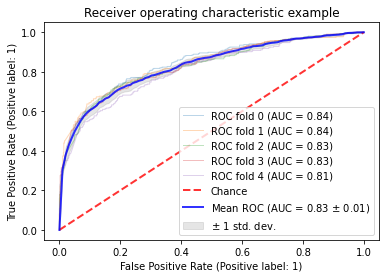

In [44]:
cv = StratifiedKFold(n_splits=5,random_state = 611,shuffle=True)
#classifier = svm.SVC( random_state=5)
#classifier = LogisticRegression(random_state=5)
#classifier = LogisticRegressionCV(random_state=5)
classifier = RandomForestClassifier(max_depth=20,n_estimators = 500, random_state=0)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X1, y1)):
    classifier.fit(X1.iloc[train], y1.iloc[train])
    viz = RocCurveDisplay.from_estimator(
        classifier,
        X1.iloc[test],
        y1.iloc[test],
        name="ROC fold {}".format(i),
        alpha=0.3,
        lw=1,
        ax=ax,
    )
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="Receiver operating characteristic example",
)
ax.legend(loc="lower right")
plt.show()

In [74]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [75]:
tag_features1 = []
tag_features0 = []

for batch in range(100):
    with open('./feature_data/web_html_tag_features_1_'+str(batch)+'.pkl', 'rb') as f:
        tag_features1 += pickle.load(f)

    with open('./feature_data/web_html_tag_features_0_'+str(batch)+'.pkl', 'rb') as f:
        tag_features0 += pickle.load(f)

print('tag feature')
print(len(tag_features1))
#print(tag_features1)
print(len(tag_features0))
#print(tag_features0)

tag_features1 = [ft for ind,ft in enumerate(tag_features1) if len(ft) >1]
tag_features0 = [ft for ind,ft in enumerate(tag_features0) if len(ft) >1]

print(len(tag_features1))
print(len(tag_features0))

data = tag_features1 + tag_features0
label = [1 for ft in tag_features1] + [0 for ft in tag_features0]



vectorizer = TfidfVectorizer()
X2 = vectorizer.fit_transform(data)
y2 = np.array(label)

tag feature
5388
13977
5113
13453


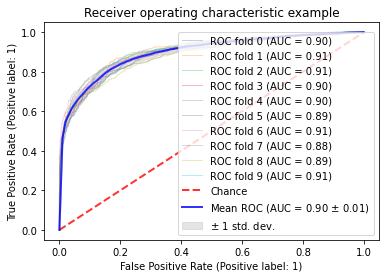

In [78]:
cv = StratifiedKFold(n_splits=10,random_state = 231,shuffle=True)
#classifier = svm.SVC( random_state=5)
#classifier = LogisticRegression(random_state=5)
#classifier = LogisticRegressionCV(random_state=5)
classifier = RandomForestClassifier(max_depth=30,n_estimators = 500, random_state=0,n_jobs=6)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X2, y2)):
    classifier.fit(X2[train], y2[train])
    viz = RocCurveDisplay.from_estimator(
        classifier,
        X2[test],
        y2[test],
        name="ROC fold {}".format(i),
        alpha=0.3,
        lw=1,
        ax=ax,
    )
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="Receiver operating characteristic example",
)
ax.legend(loc="lower right")
plt.show()

In [10]:
font_features1 = []
font_features0 = []

for batch in range(100):
    with open('./feature_data/web_font_features_1_'+str(batch)+'.pkl', 'rb') as f:
        font_features1 += pickle.load(f)

    with open('./feature_data/web_font_features_0_'+str(batch)+'.pkl', 'rb') as f:
        font_features0 += pickle.load(f)

print('font feature')
print(len(font_features1))
print(len(font_features0))
font_feature1 = [ft for ind,ft in enumerate(font_features1) if len(ft) > 0]
font_feature0 = [ft for ind,ft in enumerate(font_features0) if len(ft) > 0]
font_feature = font_feature1 + font_feature0
label = [1 for ft in font_feature1] + [0 for ft in font_feature0]

print(len(font_feature1))
print(len(font_feature0))

vectorizer = TfidfVectorizer()
X3 = vectorizer.fit_transform([' '.join(ff) for ff in font_feature])
y3 = np.array(label)

font feature
5388
13977
3190
10310


In [11]:
len(font_feature)

13500

In [12]:
len(label)

13500

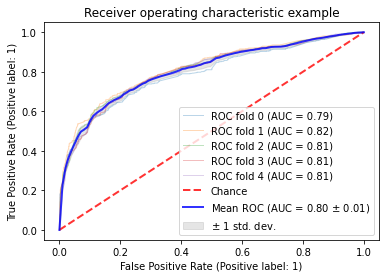

In [13]:
cv = StratifiedKFold(n_splits=5,random_state = 231,shuffle=True)
#classifier = svm.SVC( random_state=5)
#classifier = LogisticRegression(random_state=5)
#classifier = LogisticRegressionCV(random_state=5)
classifier = RandomForestClassifier(max_depth=10,n_estimators = 500, random_state=0)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X3, y3)):
    classifier.fit(X3[train], y3[train])
    viz = RocCurveDisplay.from_estimator(
        classifier,
        X3[test],
        y3[test],
        name="ROC fold {}".format(i),
        alpha=0.3,
        lw=1,
        ax=ax,
    )
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="Receiver operating characteristic example",
)
ax.legend(loc="lower right")
plt.show()

In [14]:
color_features1 = []
color_features0 = []

for batch in range(100):
    with open('./feature_data/web_color_features_1_'+str(batch)+'.pkl', 'rb') as f:
        color_features1 += pickle.load(f)

    with open('./feature_data/web_color_features_0_'+str(batch)+'.pkl', 'rb') as f:
        color_features0 += pickle.load(f)

print('color feature')
print(color_features1)
print(color_features0)
color_features1 = [ft for ind,ft in enumerate(color_features1) if len(ft) ==5]
color_features0 = [ft for ind,ft in enumerate(color_features0) if len(ft) ==5]
website_colors = color_features1 + color_features0
label = [1 for ft in color_features1] + [0 for ft in color_features0]


vectorizer = TfidfVectorizer()
X4 = vectorizer.fit_transform([' '.join(set(ff)) for ff in website_colors])
y4 = np.array(label)

color feature
[['gray', 'snow', 'orange', 'darkslategray', 'silver'], ['white', 'darkslategray', 'gold', 'darkgray', 'red'], ['whitesmoke', 'black', 'darkgray', 'white', 'teal'], ['white', 'black', 'tan', 'lightgray', 'dimgray'], ['white', 'dimgray', 'darkslategray', 'darkgray', 'steelblue'], ['lightgray', 'darkslategray', 'white', 'black', 'dimgray'], ['teal', 'white', 'silver', 'midnightblue', 'gray'], ['black', 'snow', 'darkseagreen', 'dimgray', 'lightsteelblue'], ['white', 'midnightblue', 'lavender', 'dodgerblue', 'silver'], ['snow', 'white', 'white', 'white', 'white'], ['black', 'white', 'rosybrown', 'silver', 'sienna'], ['white', 'cadetblue', 'lavender', 'teal', 'silver'], ['whitesmoke', 'darkslategray', 'slategray', 'firebrick', 'silver'], ['snow', 'darkolivegreen', 'darkcyan', 'darkslategray', 'silver'], ['white', 'darkgray', 'darkorange', 'lavender', 'darkslategray'], ['ghostwhite', 'steelblue', 'dimgray', 'darkslategray', 'silver'], ['snow', 'darkcyan', 'peru', 'silver', 'dar

In [15]:
len(website_colors)

18543

In [16]:
len(label)

18543

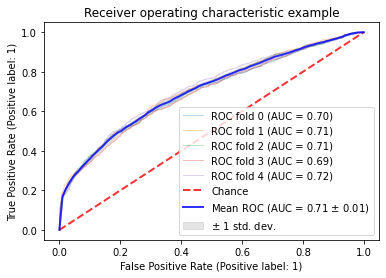

In [18]:
cv = StratifiedKFold(n_splits=5,random_state = 2131,shuffle=True)
#classifier = svm.SVC( random_state=5)
#classifier = LogisticRegression(random_state=5)
#classifier = LogisticRegressionCV(random_state=5)
classifier = RandomForestClassifier(max_depth=20, n_estimators = 500, random_state=0)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X4, y4)):
    classifier.fit(X4[train], y4[train])
    viz = RocCurveDisplay.from_estimator(
        classifier,
        X4[test],
        y4[test],
        name="ROC fold {}".format(i),
        alpha=0.3,
        lw=1,
        ax=ax,
    )
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="Receiver operating characteristic example",
)
ax.legend(loc="lower right")
plt.show()

In [37]:
from sklearn.linear_model import LogisticRegressionCV,LogisticRegression
from sklearn.metrics import roc_auc_score

<ipython-input-54-8556b4541887>:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf1 = classifier1.fit(X1.iloc[train], y1.iloc[train])
/home/hzhuang/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
<ipython-input-54-8556b4541887>:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf1 = classifier1.fit(X1.iloc[train], y1.iloc[train])
/home/hzhuang/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

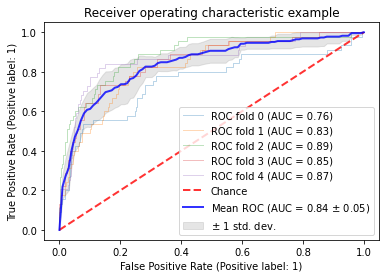

In [54]:
cv = StratifiedKFold(n_splits=5)
classifier1 = RandomForestClassifier(max_depth=5, random_state=0)
classifier2 = RandomForestClassifier(max_depth=5, random_state=0)
classifier3 = RandomForestClassifier(max_depth=5, random_state=0)
classifier4 = RandomForestClassifier(max_depth=5, random_state=0)
classifier = LogisticRegression(random_state=0)
#classifier = RandomForestClassifier(max_depth = 10,n_estimators =500, random_state=0)


tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)


fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X1, y1)):
   
    XX = []
    clf1 = classifier1.fit(X1.iloc[train], y1.iloc[train])
    F1 = clf1.predict_proba(X1.iloc[train])[:, 1]
    #print(roc_auc_score(y1.iloc[train],F1))
    clf2 = classifier2.fit(X2[train], y2[train])
    F2 = clf2.predict_proba(X2[train])[:, 1]
    #print(roc_auc_score(y1.iloc[train],F2))
    clf3 = classifier3.fit(X3[train], y3[train])
    F3 = clf3.predict_proba(X3[train])[:, 1]
    #print(roc_auc_score(y1.iloc[train],F3))
    clf4 = classifier4.fit(X4[train], y4[train])
    F4 = clf4.predict_proba(X4[train])[:, 1]
    #print(roc_auc_score(y1.iloc[train],F4))
    
    XX0 = []
    X01 = clf1.predict_proba(X1.iloc[test])[:, 1]
    #print(roc_auc_score(y1.iloc[test],X01))
    X02 = clf2.predict_proba(X2[test])[:, 1]
    #print(roc_auc_score(y1.iloc[test],X02))
    X03 = clf3.predict_proba(X3[test])[:, 1]
    #print(roc_auc_score(y1.iloc[test],X03))
    X04 = clf4.predict_proba(X4[test])[:, 1]
    #print(roc_auc_score(y1.iloc[test],X04))
    
    for ind, xx in enumerate(F1):
        #XX.append([F1[ind],F2[ind],F3[ind]])
        XX.append([F1[ind],F2[ind],F3[ind],F4[ind]])
        #XX.append([F1[ind]])
    
    for ind, xx in enumerate(X01):
        #XX0.append([X01[ind],X02[ind],X03[ind]])
        XX0.append([X01[ind],X02[ind],X03[ind],X04[ind]])
        #XX0.append([X01[ind]])
        
    
    
    classifier.fit(XX, np.array(y1)[train])
    #print(classifier.coef_)
    #print(len(XX0))
    #print(np.array(XX0)[test])
    
    viz = RocCurveDisplay.from_estimator(
        classifier,
        np.array(XX0),
        y1.iloc[test],
        name="ROC fold {}".format(i),
        alpha=0.3,
        lw=1,
        ax=ax,
    )
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="Receiver operating characteristic example",
)
ax.legend(loc="lower right")
plt.show()

In [10]:
abs_features1 = []
abs_features0 = []

for batch in range(2):
    with open('./feature_data/web_content_features_1_'+str(batch)+'_abs.pkl', 'rb') as f:
        abs_features1 += pickle.load(f)

    with open('./feature_data/web_content_features_0_'+str(batch)+'_abs.pkl', 'rb') as f:
        abs_features0 += pickle.load(f)

print('abs feature')
print(len(abs_features1))
print(len(abs_features0))

print(abs_features1)
print(abs_features0)

abs_features1_1 = [0]*len(abs_features1[0])
for ab in abs_features1:
    print(ab)
    for ind,score in enumerate(ab):
        abs_features1_1[ind] += score

abs_features1_1 = [score/len(abs_features1) for score in abs_features1_1]
print(abs_features1_1)        
        

unwhite_tb = pd.DataFrame(abs_features1_1)
unwhite_tb['label'] = 1

abs_features0_1 = [0]*len(abs_features0[0])
for ab in abs_features0:
    for ind,score in enumerate(ab):
        abs_features0_1[ind] += score

abs_features0_1 = [score/len(abs_features1) for score in abs_features1_1]


white_tb = pd.DataFrame(abs_features0_1)
white_tb['label'] = 0

all_tb = pd.concat([unwhite_tb,white_tb]).reset_index(drop=True)

X = all_tb.loc[:, all_tb.columns != 'label']
y = all_tb.loc[:, all_tb.columns == 'label']


from sklearn.model_selection import cross_val_score
clf = RandomForestClassifier(max_depth=5, random_state=0)
scores = cross_val_score(clf, X, y, cv=5)

print(scores)

abs feature
108
280
[[], [], [], [[]], [], [[]], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [[], [], [], [24.17, 15.3, 17.3, 16.36, 12.74, 17.4, 64, 14.6, 17.19, 15.04], [14.22, 19.1, 18.5, 16.72, 10.67, 22.2, 66, 14.8, 18.78, 21.79], [32.22, 14.2, 15.6, 15.78, 11.51, 17.4, 61, 11.5, 15.26, 17.14], [9.52, 18.8, 18.1, 21.01, 12.52, 24.2, 64, 18.5, 18.79, 16.44], [9.11, 19.0, 18.2, 18.74, 12.68, 22.4, 90, 18.0, 19.06, 20.87], [8.13, 21.4, 20.6, 17.71, 10.56, 25.6, 54, 24.0, 21.59, 16.51], [], [], [], [], [], []], [[34.59, 9.2, 0.0, 9.23, 14.31, 8.3, 0, 0.5, 1.2, 0.18], [], [], [34.59, 9.2, 0.0, 9.23, 14.31, 8.3, 0, 0.5, 1.2, 0.18], [], [], [], [], [34.59, 9.2, 0.0, 9.23, 14.31, 8.3, 0, 0.5, 1.2, 0.18], [34.59, 9.2, 0.0, 9.23, 14.31, 8.3, 0, 0.5, 1.2, 0.18], [], [34.59, 9.2, 0.0, 9.23, 14.31, 8.3, 0, 0.5, 1.2, 0.18], [-50.02, 21.0, 0.0, 13.12, 19.58, 17.8, 1, 0.5, 1

IndexError: list index out of range

In [20]:
def g(i):
    return [[i],[i]]

In [22]:
from joblib import Parallel, delayed
from math import sqrt
Parallel(n_jobs=2)(delayed(g)(i) for i in range(1))

[[[0], [0]]]

# Connect different features into one feature to predict

In [1]:
import pickle
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

In [2]:
web_features1 = []
web_features0 = []

for batch in range(0,100):
    with open('./labeled_feature_data/web_content_features_1_'+str(batch)+'.pkl', 'rb') as f:
        web_features1 += pickle.load(f)

    with open('./labeled_feature_data/web_content_features_0_'+str(batch)+'.pkl', 'rb') as f:
        web_features0 += pickle.load(f)

In [3]:
tag_features1 = []
tag_features0 = []

for batch in range(100):
    with open('./labeled_feature_data/web_html_tag_features_1_'+str(batch)+'.pkl', 'rb') as f:
        tag_features1 += pickle.load(f)

    with open('./labeled_feature_data/web_html_tag_features_0_'+str(batch)+'.pkl', 'rb') as f:
        tag_features0 += pickle.load(f)

In [4]:
font_features1 = []
font_features0 = []

for batch in range(100):
    with open('./labeled_feature_data/web_font_features_1_'+str(batch)+'.pkl', 'rb') as f:
        font_features1 += pickle.load(f)

    with open('./labeled_feature_data/web_font_features_0_'+str(batch)+'.pkl', 'rb') as f:
        font_features0 += pickle.load(f)


In [5]:
color_features1 = []
color_features0 = []

for batch in range(100):
    with open('./labeled_feature_data/web_color_features_1_'+str(batch)+'.pkl', 'rb') as f:
        color_features1 += pickle.load(f)

    with open('./labeled_feature_data/web_color_features_0_'+str(batch)+'.pkl', 'rb') as f:
        color_features0 += pickle.load(f)

In [6]:
len(web_features1),len(web_features0),

(5388, 13977)

In [7]:
len(tag_features1),len(tag_features0),

(5388, 13977)

In [8]:
len(font_features1),len(font_features0),

(5388, 13977)

In [9]:
len(color_features1),len(color_features0),

(5388, 13977)

In [10]:
web_features_ind0 = [ind for ind,ft in enumerate(web_features0) if len(ft) >9]
web_features_ind1 = [ind for ind,ft in enumerate(web_features1) if len(ft) >9]

In [11]:
tag_features_ind0 = [ind for ind,ft in enumerate(tag_features0) if len(ft) >1]
tag_features_ind1 = [ind for ind,ft in enumerate(tag_features1) if len(ft) >1]

In [12]:
font_features_ind0 = [ind for ind,ft in enumerate(font_features0) if len(ft) > 0]
font_features_ind1 = [ind for ind,ft in enumerate(font_features1) if len(ft) > 0]

In [13]:
color_features_ind0 = [ind for ind,ft in enumerate(color_features0) if len(ft) ==5]
color_features_ind1 = [ind for ind,ft in enumerate(color_features1) if len(ft) ==5]

In [14]:
len(web_features_ind1),len(web_features_ind0),

(4297, 8601)

In [15]:
len(tag_features_ind1),len(tag_features_ind0),

(5113, 13453)

In [16]:
len(font_features_ind1),len(font_features_ind0),

(3190, 10310)

In [17]:
len(color_features_ind1),len(color_features_ind0),

(5096, 13447)

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [19]:
vectorizer = TfidfVectorizer()

In [20]:
web_features_use = []
tag_features_use = []
font_features_use = []
color_features_use = []
label = []

In [21]:
for ind,v in enumerate(zip(web_features0,tag_features0,font_features0,color_features0)):
    w = v[0]
    t = v[1]
    f = v[2]
    c = v[3]
    if ind in web_features_ind0 and ind in tag_features_ind0 and ind in font_features_ind0 and ind in color_features_ind0:
        web_features_use.append(w)
        tag_features_use.append(t)
        font_features_use.append(f)
        color_features_use.append(c)
        label.append(0)

In [22]:
len(web_features_use)

6476

In [23]:
for ind,v in enumerate(zip(web_features1,tag_features1,font_features1,color_features1)):
    w = v[0]
    t = v[1]
    f = v[2]
    c = v[3]
    if ind in web_features_ind1 and ind in tag_features_ind1 and ind in font_features_ind1 and ind in color_features_ind1:
        web_features_use.append(w)
        tag_features_use.append(t)
        font_features_use.append(f)
        color_features_use.append(c)
        label.append(1)

In [24]:
len(web_features_use)

9240

In [25]:
content_x = web_features_use

In [26]:
tag_x = vectorizer.fit_transform(tag_features_use).todense()

In [27]:
font_x = vectorizer.fit_transform([' '.join(set(ff)) for ff in font_features_use]).todense()

In [28]:
color_x = vectorizer.fit_transform([' '.join(set(ff)) for ff in color_features_use]).todense()

In [29]:
X = []

In [30]:
for ind,w in enumerate(web_features_use):
    X.append(w+tag_x[ind].tolist()[0]+font_x[ind].tolist()[0]+color_x[ind].tolist()[0])

In [31]:
len(X)

9240

In [32]:
len(label)

9240

In [33]:
len(X[0])

2116

In [34]:
import numpy as np

In [35]:
X2 = np.array(X)
y2 = np.array(label)

In [36]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import svm, datasets
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import StratifiedKFold
import numpy as np
from sklearn.metrics import roc_auc_score

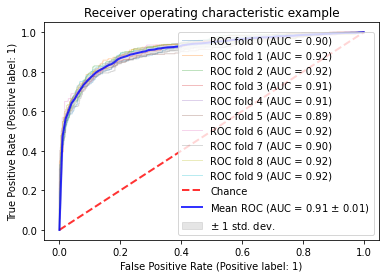

In [37]:
cv = StratifiedKFold(n_splits=10,random_state = 231,shuffle=True)
#classifier = svm.SVC( random_state=5)
#classifier = LogisticRegression(random_state=5)
#classifier = LogisticRegressionCV(random_state=5)
classifier = RandomForestClassifier(max_depth=30,n_estimators = 500, random_state=0,n_jobs=6)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X2, y2)):
    classifier.fit(X2[train], y2[train])
    viz = RocCurveDisplay.from_estimator(
        classifier,
        X2[test],
        y2[test],
        name="ROC fold {}".format(i),
        alpha=0.3,
        lw=1,
        ax=ax,
    )
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="Receiver operating characteristic example",
)
ax.legend(loc="lower right")
plt.show()

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
content_train0, content_test, content_y0, content_ytest =  train_test_split(content_x, label, test_size = 0.2,random_state=6)
content_train1, content_train2,content_ytr1, content_ytr2 =  train_test_split(content_train0,content_y0, test_size = 0.5,random_state=6)

In [39]:
content_classifier = RandomForestClassifier(max_depth=30,n_estimators = 500, random_state=0,n_jobs=6).fit(content_train1,content_ytr1)

In [40]:
content_input_x = content_classifier.predict_proba(content_train2)[:,1]

In [45]:
np.mean(content_ytr2)

0.3051948051948052

In [42]:
tag_train0, tag_test, tag_y0, tag_ytest =  train_test_split(tag_x, label, test_size = 0.2,random_state=6)
tag_train1, tag_train2,tag_ytr1, tag_ytr2 =  train_test_split(tag_train0,tag_y0, test_size = 0.5,random_state=6)

In [43]:
tag_classifier = RandomForestClassifier(max_depth=30,n_estimators = 500, random_state=0,n_jobs=6).fit(tag_train1,tag_ytr1)

/home/hzhuang/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


In [44]:
tag_input_x = tag_classifier.predict_proba(tag_train2)[:,1]

/home/hzhuang/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


In [46]:
np.mean(tag_ytr2)

0.3051948051948052

In [47]:
font_train0, font_test, font_y0, font_ytest =  train_test_split(font_x, label, test_size = 0.2,random_state=6)
font_train1, font_train2,font_ytr1, font_ytr2 =  train_test_split(font_train0,font_y0, test_size = 0.5,random_state=6)

In [48]:
font_classifier = RandomForestClassifier(max_depth=30,n_estimators = 500, random_state=0,n_jobs=6).fit(font_train1,font_ytr1)

/home/hzhuang/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


In [49]:
font_input_x = font_classifier.predict_proba(font_train2)[:,1]

/home/hzhuang/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


In [50]:
color_train0, color_test, color_y0, color_ytest =  train_test_split(color_x, label, test_size = 0.2,random_state=6)
color_train1, color_train2,color_ytr1, color_ytr2 =  train_test_split(color_train0,color_y0, test_size = 0.5,random_state=6)

In [51]:
color_classifier = RandomForestClassifier(max_depth=30,n_estimators = 500, random_state=0,n_jobs=6).fit(color_train1,color_ytr1)

/home/hzhuang/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


In [52]:
color_input_x = color_classifier.predict_proba(color_train2)[:,1]

/home/hzhuang/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


In [53]:
from sklearn.linear_model import LogisticRegression

In [54]:
XX = []

In [55]:
for ind,w in enumerate(content_input_x):
    XX.append([w, tag_input_x[ind], font_input_x[ind], color_input_x[ind]])

In [56]:
XX[0]

[0.356, 0.10296169233908946, 0.20335227050807095, 0.1917436830981882]

In [57]:
from sklearn.metrics import average_precision_score

In [58]:
clf = LogisticRegression(random_state=0).fit(XX, color_ytr2)
print(clf.classes_)
y_scores = clf.predict_proba(XX)[:,1]

[0 1]


In [59]:
clf.coef_

array([[1.5937121 , 4.71487961, 2.18841262, 0.41899451]])

In [60]:
average_precision_score(color_ytr2, y_scores)

0.8402529285645591

In [61]:
from sklearn.metrics import roc_auc_score

roc_auc_score(color_ytr2, y_scores)

0.8938507351803983

In [62]:
content_input_test_x = content_classifier.predict_proba(content_test)[:,1]

In [63]:
tag_input_test_x = tag_classifier.predict_proba(tag_test)[:,1]

/home/hzhuang/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


In [64]:
font_input_test_x = font_classifier.predict_proba(font_test)[:,1]

/home/hzhuang/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


In [65]:
color_input_test_x = color_classifier.predict_proba(color_test)[:,1]

/home/hzhuang/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


In [66]:
XXX = []

In [67]:
for ind,w in enumerate(content_input_test_x):
    XXX.append([w, tag_input_test_x[ind], font_input_test_x[ind], color_input_test_x[ind]])

In [68]:
y_scores = clf.predict_proba(XXX)[:,1]

In [69]:
average_precision_score(color_ytest, y_scores)

0.8354607077944549

In [70]:
roc_auc_score(font_ytest, y_scores)

0.9023914058716358

In [71]:
roc_auc_score(color_ytest, y_scores)

0.9023914058716358

In [38]:
web_features_use2 = []
tag_features_use2 = []
font_features_use2 = []
color_features_use2 = []
label2 = []

In [39]:
for ind,v in enumerate(zip(web_features0,tag_features0,font_features0,color_features0)):
    w = v[0]
    t = v[1]
    f = v[2]
    c = v[3]
    if ind in web_features_ind0:
        web_features_use2.append(w)
    else:
        web_features_use2.append([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 19473, 0, 0, 0, 0, 0])
    if ind in tag_features_ind0:
        tag_features_use2.append(t)
    else:
        tag_features_use2.append('empty html tag')
        
    if ind in font_features_ind0:
        font_features_use2.append(f)
    else:
        font_features_use2.append('not found')
        
    if ind in color_features_ind0:
        color_features_use2.append(c)
    else:
        color_features_use2.append(['empty'])
        
    label2.append(0)

In [40]:
len(label2)

13977

In [41]:
for ind,v in enumerate(zip(web_features1,tag_features1,font_features1,color_features1)):
    w = v[0]
    t = v[1]
    f = v[2]
    c = v[3]
    if ind in web_features_ind1:
        web_features_use2.append(w)
    else:
        web_features_use2.append([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 19473, 0, 0, 0, 0, 0])
    if ind in tag_features_ind1:
        tag_features_use2.append(t)
    else:
        tag_features_use2.append('empty html tag')
        
    if ind in font_features_ind1:
        font_features_use2.append(f)
    else:
        font_features_use2.append('not found')
        
    if ind in color_features_ind1:
        color_features_use2.append(c)
    else:
        color_features_use2.append(['empty'])
        
    label2.append(1)

In [42]:
len(label2)

19365

In [43]:
tag_x2 = vectorizer.fit_transform(tag_features_use2).todense()

In [44]:
font_x2 = vectorizer.fit_transform([' '.join(set(ff)) for ff in font_features_use2]).todense()

In [45]:
color_x2 = vectorizer.fit_transform([' '.join(set(ff)) for ff in color_features_use2]).todense()

In [46]:
X2 = []

In [47]:
for ind,w in enumerate(web_features_use2):
    X2.append(w+tag_x2[ind].tolist()[0]+font_x2[ind].tolist()[0]+color_x2[ind].tolist()[0])

In [48]:
X3 = np.array(X2)
y3 = np.array(label2)

In [49]:
X3[0]

array([0., 0., 0., ..., 0., 0., 0.])

In [50]:
np.mean(y3)

0.2782339271882262

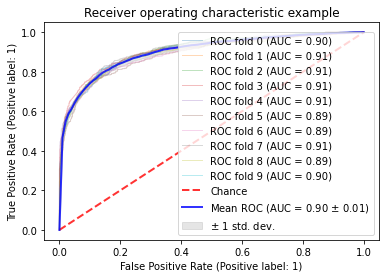

In [52]:
cv = StratifiedKFold(n_splits=10,random_state = 231,shuffle=True)
#classifier = svm.SVC( random_state=5)
#classifier = LogisticRegression(random_state=5)
#classifier = LogisticRegressionCV(random_state=5)
classifier = RandomForestClassifier(max_depth=30,n_estimators = 1000, random_state=0,n_jobs=6)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X3, y3)):
    classifier.fit(X3[train], y3[train])
    viz = RocCurveDisplay.from_estimator(
        classifier,
        X3[test],
        y3[test],
        name="ROC fold {}".format(i),
        alpha=0.3,
        lw=1,
        ax=ax,
    )
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="Receiver operating characteristic example",
)
ax.legend(loc="lower right")
plt.show()